<a href="https://colab.research.google.com/github/SofiClama/IAcodes/blob/main/mlpdocs/ImplementacaoMLP_SofiaTeixeira.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1 - Importações e Funções Básicas.**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Função de ativação sigmoid e sua derivada
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    sx = sigmoid(x)
    return sx * (1 - sx)

# Função que simula a resposta de um circuito RC
def Vc_RC(t, r=5, c=0.1, vin=1):
    tau = -t / (r * c)
    return vin * (1 - np.exp(tau))

# **2 - Classe da Rede Neural (MLP).**

In [ ]:
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.5):
        # Inicialização dos pesos (aleatórios)
        self.W0 = np.random.randn(input_size, hidden_size)
        self.W1 = np.random.randn(hidden_size, output_size)
        self.learning_rate = learning_rate

    def feedforward(self, X):
        self.Z0 = np.dot(X, self.W0)
        self.A0 = sigmoid(self.Z0)

        self.Z1 = np.dot(self.A0, self.W1)
        self.A1 = sigmoid(self.Z1)

        return self.A1

    def backpropagation(self, X, Y):
        error_output = self.A1 - Y
        delta_output = error_output * sigmoid_derivative(self.Z1)

        error_hidden = np.dot(delta_output, self.W1.T)
        delta_hidden = error_hidden * sigmoid_derivative(self.Z0)

        self.W1 -= self.learning_rate * np.dot(self.A0.T, delta_output)
        self.W0 -= self.learning_rate * np.dot(X.T, delta_hidden)

    def train(self, X, Y, epochs):
        mse_list = []
        for epoch in range(epochs):
            output = self.feedforward(X)
            loss = np.mean((output - Y) ** 2)
            mse_list.append(loss)
            self.backpropagation(X, Y)
        return mse_list

    def predict(self, X):
        return self.feedforward(X)

# **3 - Preparação dos Dados.**

In [ ]:
# Geração dos dados
t = np.arange(0, 3.1, 0.1)
Vc = Vc_RC(t)

# Normalização
t_norm = (t - np.min(t)) / (np.max(t) - np.min(t))
Vc_norm = (Vc - np.min(Vc)) / (np.max(Vc) - np.min(Vc))

# Divisão treino/teste (60% treino, 40% teste)
split = int(0.6 * len(t))
X_train = t_norm[:split].reshape(-1, 1)
Y_train = Vc_norm[:split].reshape(-1, 1)
X_test = t_norm[split:].reshape(-1, 1)
Y_test = Vc_norm[split:].reshape(-1, 1)

# **4 - Treinamento da Rede.**

In [ ]:
# Instanciando a rede
nn_vc_model = NeuralNetwork(input_size=1, hidden_size=10, output_size=1, learning_rate=0.5)

# Salvando pesos iniciais
pesos_0_iniciais = np.array(nn_vc_model.W0.copy())
pesos_1_iniciais = np.array(nn_vc_model.W1.copy())

# Treinamento
erro = nn_vc_model.train(X_train, Y_train, epochs=500)

# Pesos finais
pesos_0_finais = np.array(nn_vc_model.W0)
pesos_1_finais = np.array(nn_vc_model.W1)

# **5 - Gráficos.**

1 - Dados de treino vs teste

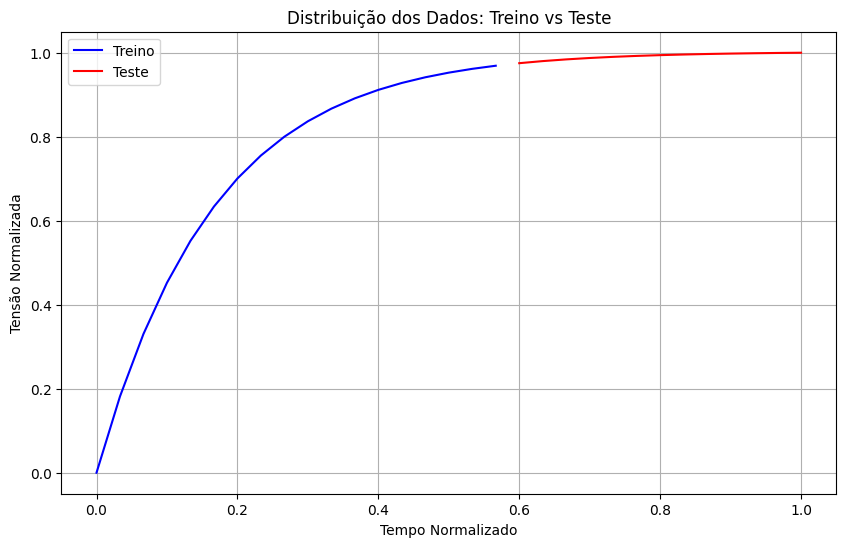

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(X_train.flatten(), Y_train.flatten(), 'b', label="Treino")
plt.plot(X_test.flatten(), Y_test.flatten(), 'r', label="Teste")
plt.legend()
plt.title("Distribuição dos Dados: Treino vs Teste")
plt.xlabel("Tempo Normalizado")
plt.ylabel("Tensão Normalizada")
plt.grid()
plt.show()

2 - Pesos antes do treinamento

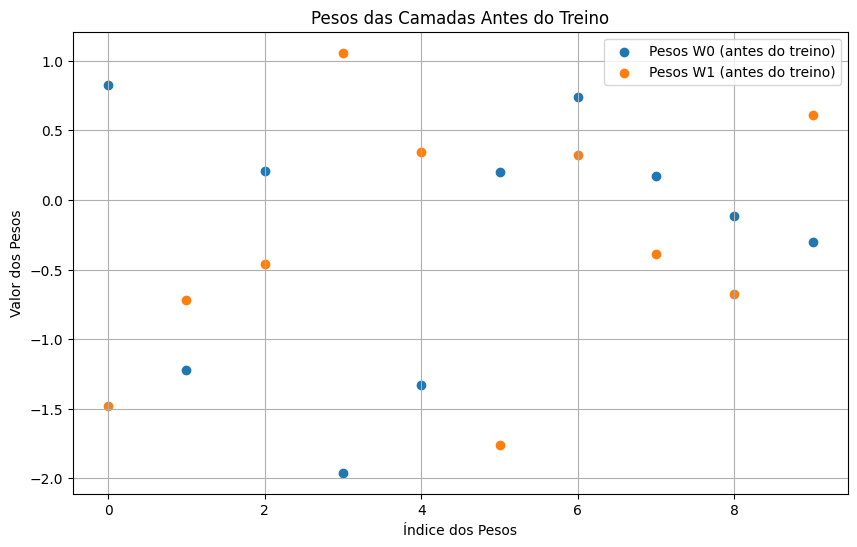

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(np.arange(len(pesos_0_iniciais.flatten())), pesos_0_iniciais.flatten(), label="Pesos W0 (antes do treino)")
plt.scatter(np.arange(len(pesos_1_iniciais.flatten())), pesos_1_iniciais.flatten(), label="Pesos W1 (antes do treino)")
plt.legend()
plt.title("Pesos das Camadas Antes do Treino")
plt.xlabel("Índice dos Pesos")
plt.ylabel("Valor dos Pesos")
plt.grid()
plt.show()

3 - Pesos após o treinamento

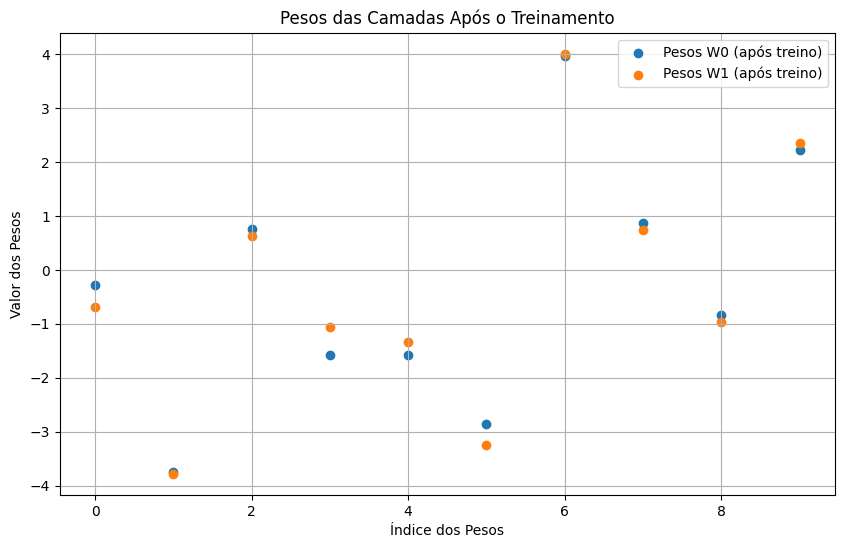

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(np.arange(len(pesos_0_finais.flatten())), pesos_0_finais.flatten(), label="Pesos W0 (após treino)")
plt.scatter(np.arange(len(pesos_1_finais.flatten())), pesos_1_finais.flatten(), label="Pesos W1 (após treino)")
plt.legend()
plt.title("Pesos das Camadas Após o Treinamento")
plt.xlabel("Índice dos Pesos")
plt.ylabel("Valor dos Pesos")
plt.grid()
plt.show()

4 - Evolução do erro (MSE)

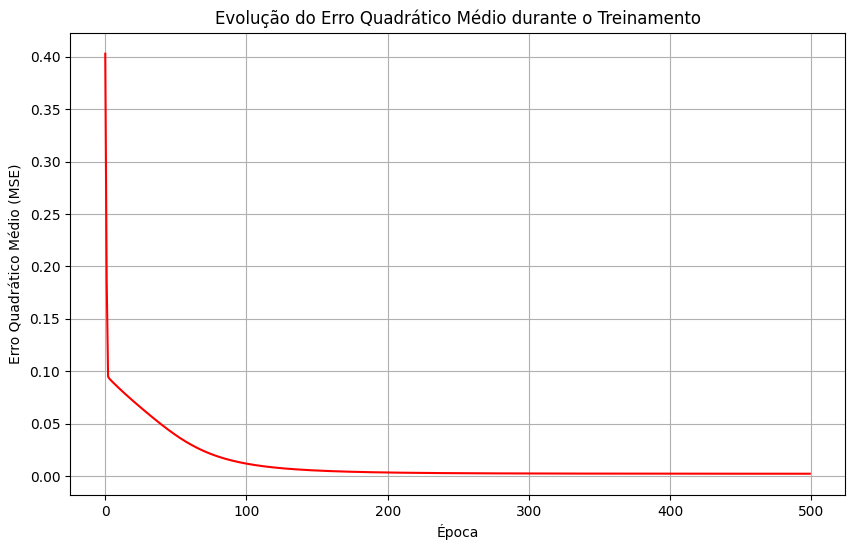

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(erro, 'r')
plt.title("Evolução do Erro Quadrático Médio durante o Treinamento")
plt.xlabel("Época")
plt.ylabel("Erro Quadrático Médio (MSE)")
plt.grid()
plt.show()

5 - Predição vs real (teste)

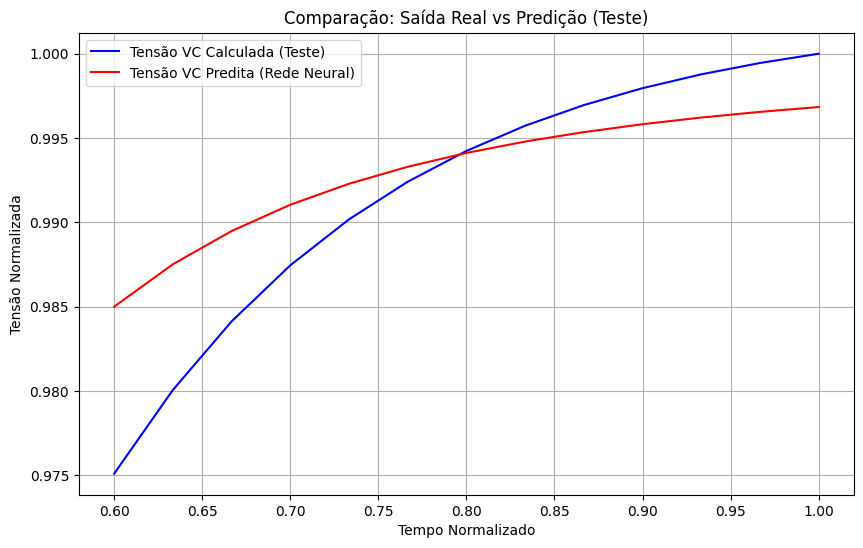

In [ ]:
saida_rede = nn_vc_model.predict(X_test)

plt.figure(figsize=(10, 6))
plt.plot(X_test.flatten(), Y_test.flatten(), 'b', label="Tensão VC Calculada (Teste)")
plt.plot(X_test.flatten(), saida_rede.flatten(), 'r', label="Tensão VC Predita (Rede Neural)")
plt.legend()
plt.title("Comparação: Saída Real vs Predição (Teste)")
plt.xlabel("Tempo Normalizado")
plt.ylabel("Tensão Normalizada")
plt.grid()
plt.show()

6 - Dados completos (treino + teste + predição)

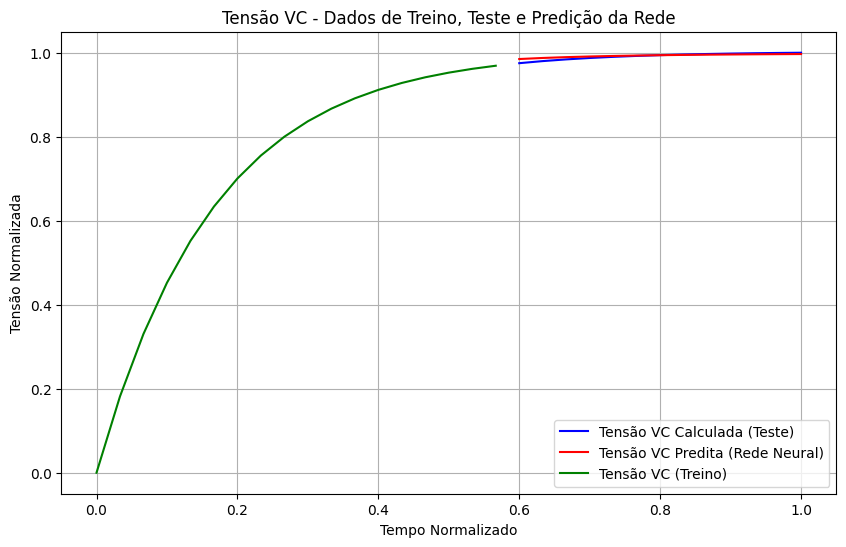

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(X_test.flatten(), Y_test.flatten(), 'b', label="Tensão VC Calculada (Teste)")
plt.plot(X_test.flatten(), saida_rede.flatten(), 'r', label="Tensão VC Predita (Rede Neural)")
plt.plot(X_train.flatten(), Y_train.flatten(), 'g', label="Tensão VC (Treino)")
plt.legend()
plt.title("Tensão VC - Dados de Treino, Teste e Predição da Rede")
plt.xlabel("Tempo Normalizado")
plt.ylabel("Tensão Normalizada")
plt.grid()
plt.show()